<a href="https://colab.research.google.com/github/PankajBGadge/The-Global-Terrorism-Database-Analysis/blob/main/Pankaj_B_GadgeYes_Bank_Stock_Closing_Price_Capstone_Project_ipynseb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# <b>Problem Statement: The main objective is to predict the stock’s closing price of the month. </b>


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**
If we load large dataset directly,it create error when running. So we run dataset using encoding.

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 Regression/data_YesBank_StockPrices.csv')

# **Data Inspection**

In [4]:
dataset.head(20)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
dataset.dropna()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [8]:
len(dataset[dataset.duplicated()])

0

# **Variable Description**

'Year': Year of terrorist attacks,

'Month':Month of terrorist attacks

'Day':Date of month of terrorist attacks

'Country':Contry of terrorist attacks

'Region':Region of terrorist attacks

'State':State of terrorist attacks

'City': City of terrorist attacks

'Latitude':Latitude of terrorist attacks

'Longitude':Longitude of terrorist attacks

'Attack_Type':Type of terrorist attacks

'Summary':A brief statement or account of the main points of terrorist attacks.

'Target': A person, object, or place selected as the aim of an attack.

'Weapon_type':Weapon used in terrorist attacks

'Kills': Number of people killed in terrorist attacks

'Wound': Number of people wounded in terrorist attacks

'Motive': Motive of terrorist attacks

'Terrorist_Group': Name of terrorist group 


# **Exploratory Data Analysis**
Count plots and bar plots are two types of visualizations that Seaborn calls "categorical plots". Categorical plots involve a categorical variable, which is a variable that consists of a fixed, typically small number of possible values, or categories. These types of plots are commonly used when we want to make comparisons between different groups.

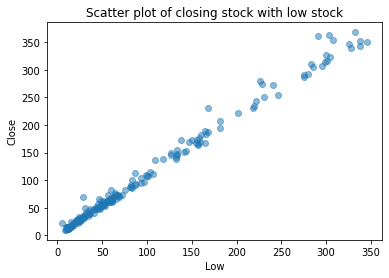

In [9]:
plt.scatter(dataset['Low'], dataset['Close'], alpha=0.5)
plt.title('Scatter plot of closing stock with low stock')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

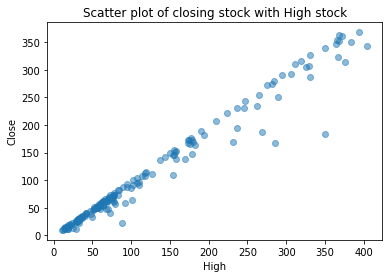

In [10]:
plt.scatter(dataset['High'], dataset['Close'], alpha=0.5)
plt.title('Scatter plot of closing stock with High stock')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

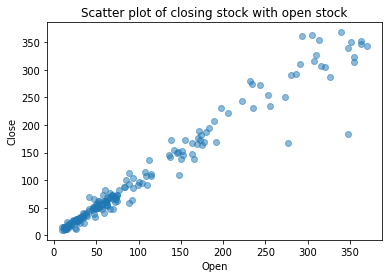

In [11]:
plt.scatter(dataset['Open'], dataset['Close'], alpha=0.5)
plt.title('Scatter plot of closing stock with open stock')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

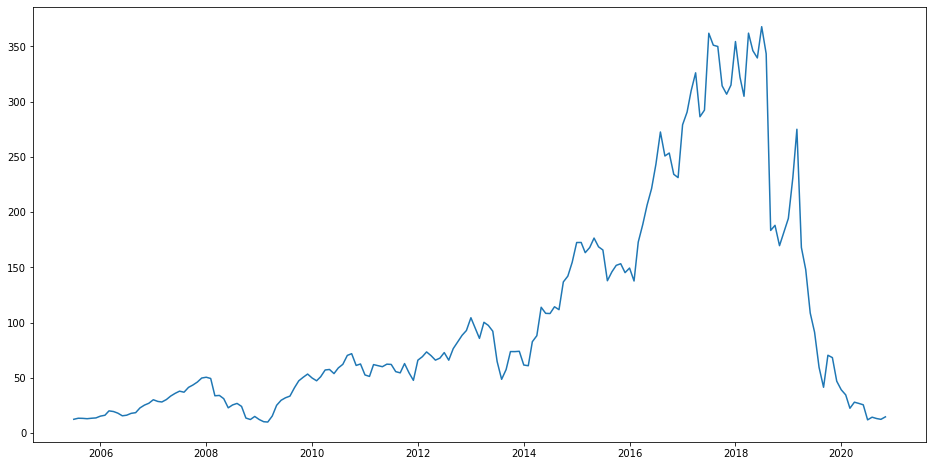

In [13]:

#setting index as date
dataset['date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['Close'], label='Close Price history')